### Overview of InterDependence Score (IDS) computation 

This notebook provides code for computing IDS between variables using our library.  Here, we assume that the user only has numpy installed (rather than PyTorch).    

In [1]:
import numpy as np
import ids
import matplotlib.pyplot as plt

# Setting random seed for reproducibility
SEED = 777
np.random.seed(SEED)

### Data generation

We begin by using IDS to identify nonlinear dependencies arising between a pair of variables, $x, y$.  Below, samples are drawn according to $x \sim \mathcal{N}(0, 1)$ and $y = x^2$.  The code below generates 100 samples from this data distribution and visualizes the data.  

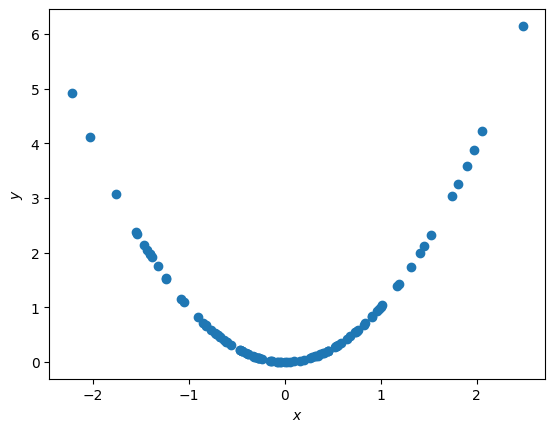

In [2]:
n = 100  # Number of samples
dx = 1  # Number of input variables
dy = 1  # Number of output variables 

# Setting up data x, y 
x = np.random.normal(size=(n, dx))
y = np.random.normal(size=(n, dy))
y[:, 0] = np.square(x[:, 0])

plt.scatter(x[:, 0], y[:, 0])
plt.xlabel(f'$x$')
plt.ylabel(f'$y$')
plt.show()

### IDS computation

The cell below shows how to use our IDS package to check for dependence. The high IDS value ($> 0.9$) provides evidence that the variables are not independent.  

In [4]:
# Returns a 1 x 1 matrix containing the IDS between x and y
C = ids.compute_IDS(x, y)
print("IDS between x and y: ", C)

IDS between x and y:  [[0.9897309]]


Suppose we want a p-value to indicate whether this IDS value is statistically significant.  We provide functionality to do just this through permutation testing, as shown below.

In [5]:
C, p_vals = ids.compute_IDS(x, y, p_val=True, num_tests=1000)
print("IDS between x and y: ", C)
print("P-value for IDS (computed using 1000 permutation tests): ", p_vals)

100%|██████████| 1000/1000 [00:00<00:00, 4544.96it/s]

IDS between x and y:  [[0.9897309]]
P-value for IDS (computed using 1000 permutation tests):  [[0.]]


The computed p-value is zero, indicating that we can reject the null hypothesis of independence.  

### Using IDS to test for independence between multiple sets of variables $\{x_i\}, \{y_j\}$

Above, we used IDS to test whether a pair of variables were independent.  We now show how our library can be used to test for independence between multiple variables simultaneously.

### Data generation

In the following cell, we generate 500 pairs of the form $(x, y)$ where $x$ is 100-dimensional and $y$ is 2 dimensional with $x \sim \mathcal{N}(0, 1)$ and $y_1 = (x_1 + x_3)^2$ and $y_2 = | \sin(x_2) |$.  Our goal is to identify that $y_1$ only depends on $x_1, x_3$ and that $y_2$ depends only on $x_2$.

In [6]:
n = 500  # Number of samples
dx = 10  # Number of input variables
dy = 2  # Number of output variables 

# Setting up data X, y 

X = np.random.normal(size=(n, dx))
y = np.random.normal(size=(n, dy))
y[:, 0] = np.square(X[:, 0] + X[:, 2])
y[:, 1] = np.abs(np.sin(X[:, 1]))

### IDS computation

The following cell shows how to call IDS and compute dependencies between all variables $\{x_1, \ldots, x_{100}\}$ and $\{y_1, y_2\}$  given samples in the form $X$ of size $500 \times 10$ and $y$ of size $500 \times 2$.   The resulting IDS matrix $C$ is of size $10 \times 2$ where the entry $(i, j)$ indicates the IDS between $x_i$ and $y_j$. 

In [7]:
C = ids.compute_IDS(X, y)
print(C)

[[0.41028577 0.05832708]
 [0.08135415 0.99296539]
 [0.3661389  0.08385883]
 [0.06084423 0.05271102]
 [0.09057691 0.10294692]
 [0.11566838 0.0742584 ]
 [0.09054531 0.09104957]
 [0.08813546 0.09880346]
 [0.12667839 0.08324333]
 [0.07845108 0.08387541]]


Just like in our previous example, we can use permutation testing to get p-values.  

In [8]:
C, p_vals = ids.compute_IDS(X, y, p_val=True, num_tests=1000)
print(p_vals)

100%|██████████| 1000/1000 [00:01<00:00, 552.70it/s]

[[0.    0.757]
 [0.588 0.   ]
 [0.    0.336]
 [0.892 0.792]
 [0.41  0.151]
 [0.137 0.488]
 [0.445 0.241]
 [0.464 0.177]
 [0.06  0.371]
 [0.644 0.341]]


Here, we find that $(x_1, y_1), (x_3, y_1), (x_2, y_2)$ are the only pairs of variables for which we reject the null hypothesis (p-value $< 0.001$ after 1000 permutation tests).

### Using IDS to test for independence between all pairs of variables in a set $\{x_i\}$

As a last example, we show how our library can be used to test for independence between all $d^2$ pairs of variables given a single data matrix $X$ of size $n \times d$.  

Below, we create a dataset of n=1000 samples and d=6 variables $\{x_1, \ldots, x_{6}\}$ among which $(x_1, x_3)$, $(x_2, x_3)$, and $(x_4, x_5)$ are dependent.  

In [10]:
n = 1000  # Number of samples
dx = 6  # Number of variables

# Setting up data X 

X = np.random.normal(size=(n, dx))
X[:, 2] = np.square(X[:, 0] + X[:, 1])
X[:, 4] = np.abs(np.sin(X[:, 3]))

### IDS computation

We now show how to use our library to compute IDS (and p-values) between all 36 pairs of variables.  The difference is that we now only pass the $X$ matrix in to the IDS call.  

In [11]:
C, p_vals = ids.compute_IDS(X, p_val=True, num_tests=1000)
print(p_vals)

100%|██████████| 1000/1000 [00:01<00:00, 543.60it/s]

[[0.    0.76  0.    0.05  0.367 0.722]
 [0.76  0.    0.    0.287 0.743 0.084]
 [0.    0.    0.    0.838 0.889 0.332]
 [0.05  0.287 0.838 0.    0.    0.678]
 [0.367 0.743 0.889 0.    0.    0.822]
 [0.722 0.084 0.332 0.678 0.822 0.   ]]


In the matrix above, we find that p-values are zeros along the diagonal (every variable is clearly dependent on itself) and also at locations corresponding to pairs of variables that were dependent (i.e., $(x_1, x_3)$, $(x_2, x_3)$, and $(x_4, x_5)$). 